<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/10%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)

    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    #one hot encode y
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

#스케일링
from sklearn.preprocessing import StandardScaler

# 원래 shape 저장
n_samples, n_timesteps, n_features = trainX.shape

# (7352*128, 9) 형태로 변환 — 모든 시점의 feature를 하나로 봄
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX.reshape(-1, n_features)).reshape(n_samples, n_timesteps, n_features)
testX = scaler.transform(testX.reshape(-1, n_features)).reshape(testX.shape)

from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3958942637.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [6]:
import tensorflow as tf

model_LSTM = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dense(units=y_train_one_hot.shape[1], activation='softmax') # Changed units and added softmax for classification
])

In [7]:
model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history_lstm = model_LSTM.fit(X_train, y_train_one_hot, epochs=50, batch_size=8, verbose=2, validation_data=(X_val, y_val_one_hot))

Epoch 1/50
736/736 - 7s - 10ms/step - accuracy: 0.8427 - loss: 0.4478 - val_accuracy: 0.9293 - val_loss: 0.1947
Epoch 2/50
736/736 - 7s - 9ms/step - accuracy: 0.9350 - loss: 0.1725 - val_accuracy: 0.9361 - val_loss: 0.1454
Epoch 3/50
736/736 - 6s - 8ms/step - accuracy: 0.9432 - loss: 0.1479 - val_accuracy: 0.9320 - val_loss: 0.1474
Epoch 4/50
736/736 - 7s - 9ms/step - accuracy: 0.9466 - loss: 0.1331 - val_accuracy: 0.9402 - val_loss: 0.1277
Epoch 5/50
736/736 - 6s - 8ms/step - accuracy: 0.9512 - loss: 0.1204 - val_accuracy: 0.9402 - val_loss: 0.1227
Epoch 6/50
736/736 - 10s - 14ms/step - accuracy: 0.9430 - loss: 0.1382 - val_accuracy: 0.9307 - val_loss: 0.1576
Epoch 7/50
736/736 - 7s - 9ms/step - accuracy: 0.9422 - loss: 0.1438 - val_accuracy: 0.9300 - val_loss: 0.1662
Epoch 8/50
736/736 - 6s - 9ms/step - accuracy: 0.9476 - loss: 0.1262 - val_accuracy: 0.9456 - val_loss: 0.1301
Epoch 9/50
736/736 - 7s - 9ms/step - accuracy: 0.9502 - loss: 0.1232 - val_accuracy: 0.9381 - val_loss: 0.140

학습시간 5분

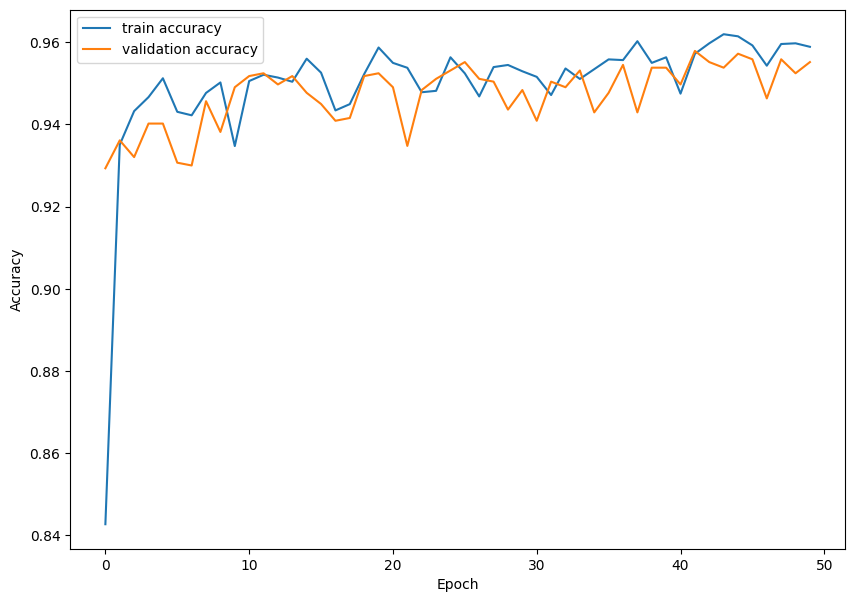

In [9]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 50 # 에포크 수 정의
history = history_lstm # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['accuracy'], label='train accuracy')
plt.plot(range(N_EPOCHS), history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

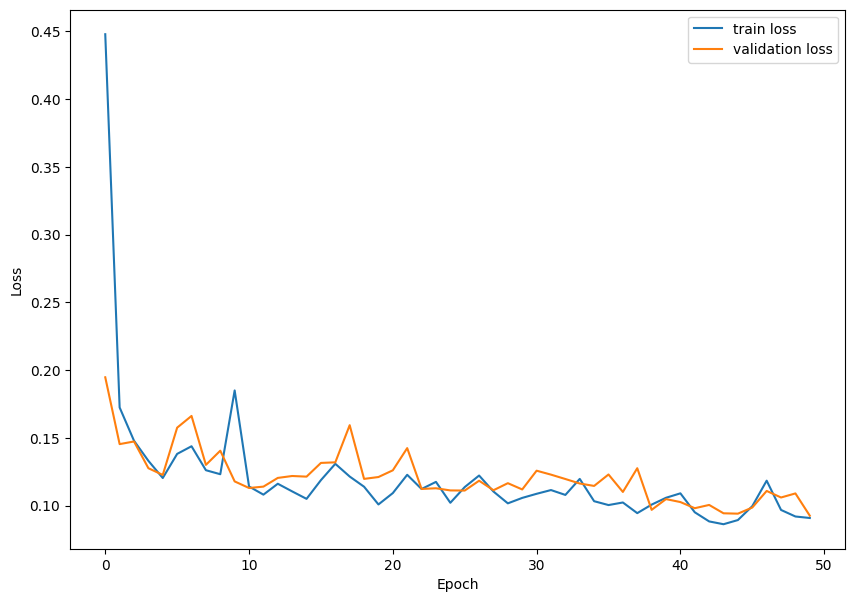

In [10]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 50 # 에포크 수 정의
history = history_lstm # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
test_loss, test_acc = model_LSTM.evaluate(testX, testy_one_hot)
print(f"Test accuracy: {test_acc:.2%}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8850 - loss: 0.3770
Test accuracy: 92.70%
